****Netflix Clustering Project****

**Github**

https://github.com/aniket010011/Intern-Projects

**Problem Description**

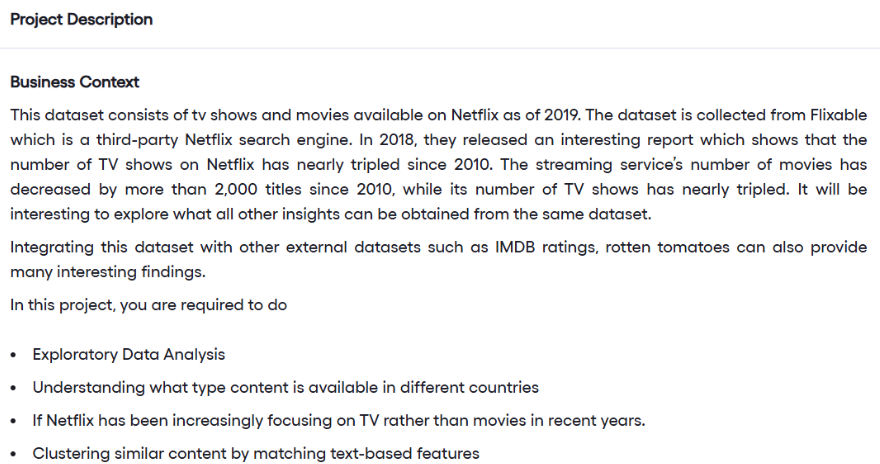

**Objective**

1. Perform Exploratory Data Analysis(EDA)
2. Understanding the kind of movies produced based on country
3. The point in time Netflix sees maximum growth
4. Clustering content based on text based attributes

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, fbeta_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [143]:
file_data = '/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df_data = pd.read_csv(file_data)

In [144]:
df_data.shape

(7787, 12)

In [145]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Duplicates if any

In [146]:
df_data.duplicated().sum()

np.int64(0)

Missing Values

In [147]:
df_data.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


Visualizing missing values

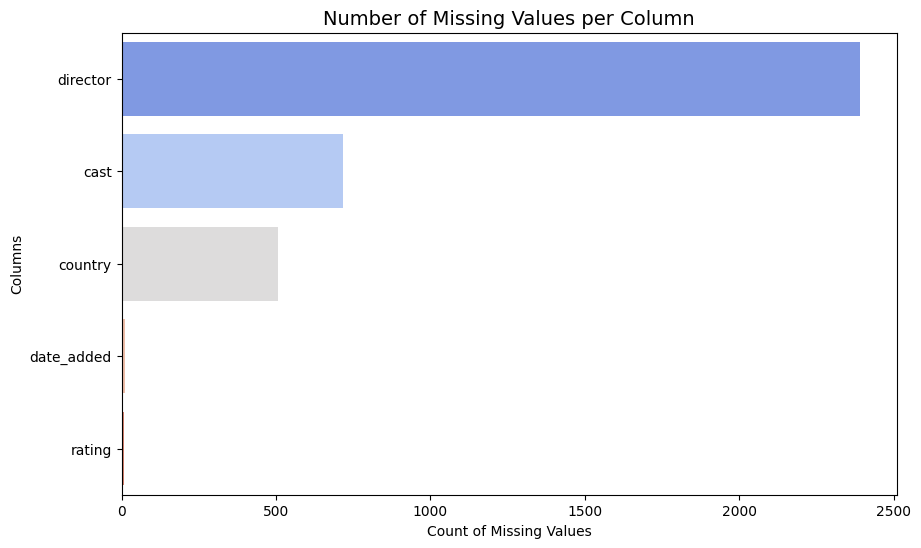

In [148]:
missing_values = df_data.isna().sum().sort_values(ascending=False)

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="coolwarm")
plt.title("Number of Missing Values per Column", fontsize=14)
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()

In [149]:
df_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [150]:
df_data['title'].value_counts()

,count
title,
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,1
3%,1
7:19,1
23:59,1
9,1
...,...
Oct-01,1
3022,1
"2,215",1


Removing unnecessary columns and columns with highest missing values

In [151]:
df_data.drop(['show_id', 'director'], axis=1, inplace=True)

In [152]:
len(df_data.columns)

10

In [153]:
df_data.head(10)

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,Movie,187,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,Movie,706,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,Movie,1920,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


Analyzing show contents present in dataset

Starting with Univariate Analysis

Type of Shows

In [154]:
df_data['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [155]:
df_data['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


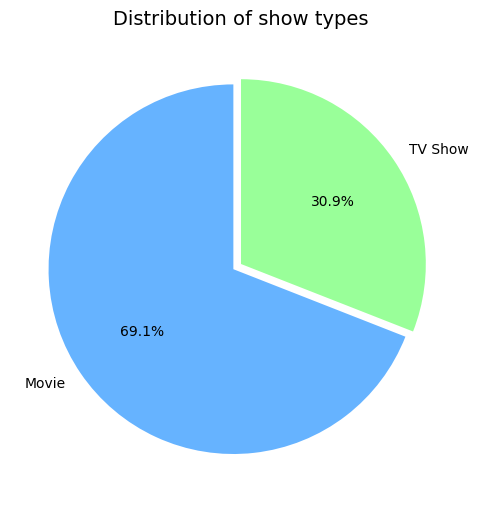

In [156]:
values = df_data['type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(values,
        labels=values.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#99ff99'],
        explode=(0.05, 0))

plt.title(f"Distribution of show types", fontsize=14)
plt.show()

As can be noted from the pie chart, majority of the shows are movies with movies being more than twice the number of TV shows

Shows by Casts

In [157]:
df_data['cast'].value_counts()

,count
cast,
David Attenborough,18
Samuel West,10
Jeff Dunham,7
Kevin Hart,6
Craig Sechler,6
...,...
"Awie, Arab Khalid, Sharwani Ns, Tj Isa, Delimawati, Zul Ariffin, Uqasha Senrose, Ropie Cecupak",1
Hans Zimmer,1
Hans Teeuwen,1


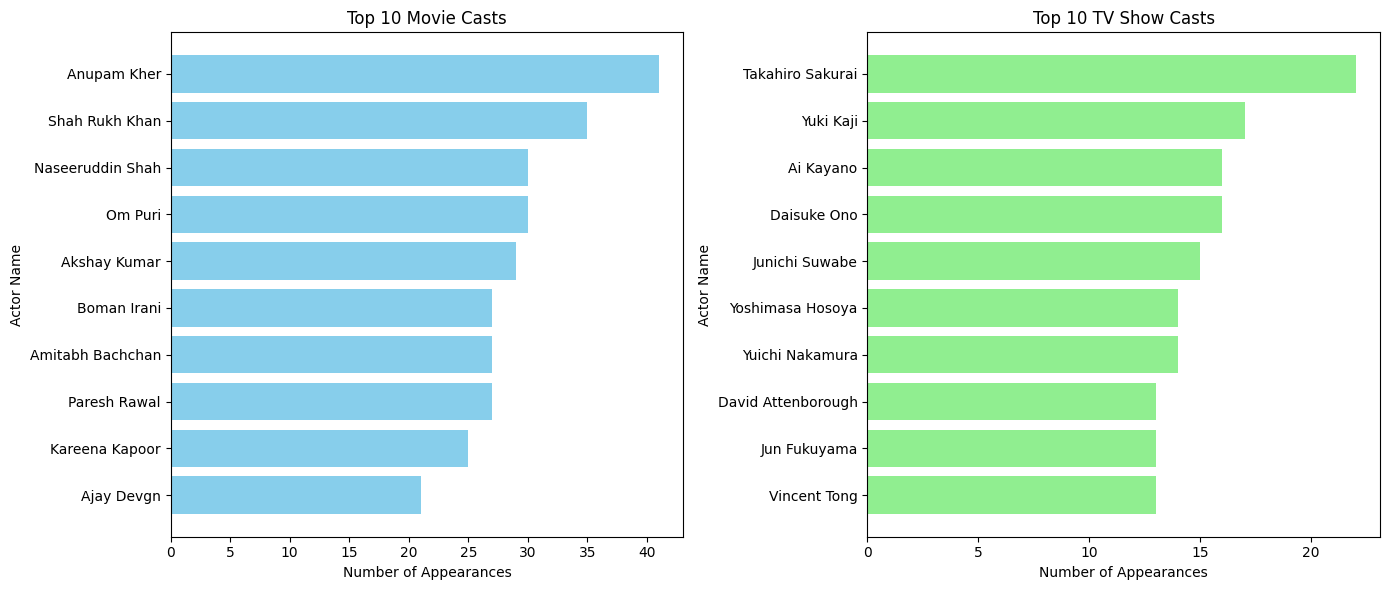

In [158]:
filtered = df_data.dropna(subset=['cast'])

movie_casts = filtered[filtered['type'] == 'Movie']['cast']
tv_casts = filtered[filtered['type'] == 'TV Show']['cast']

movie_cast_list = [name.strip() for sublist in movie_casts for name in sublist.split(',')]
tv_cast_list = [name.strip() for sublist in tv_casts for name in sublist.split(',')]

movie_cast_count = pd.Series(movie_cast_list).value_counts().head(10)
tv_cast_count = pd.Series(tv_cast_list).value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(movie_cast_count.index[::-1], movie_cast_count.values[::-1], color='skyblue')
axes[0].set_title('Top 10 Movie Casts')
axes[0].set_xlabel('Number of Appearances')
axes[0].set_ylabel('Actor Name')

axes[1].barh(tv_cast_count.index[::-1], tv_cast_count.values[::-1], color='lightgreen')
axes[1].set_title('Top 10 TV Show Casts')
axes[1].set_xlabel('Number of Appearances')
axes[1].set_ylabel('Actor Name')

plt.tight_layout()
plt.show()

The above plot differentiates actors in cast for movies and tv shows and lists them by the number of appearances. Anupam Kher and Shah Rukh Khan are the top 2 movie actors while Takahiro Sakurai and Yuki Kaji are the top 2 tv show actors

Top 10 Countries of origin

In [159]:
df_data['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


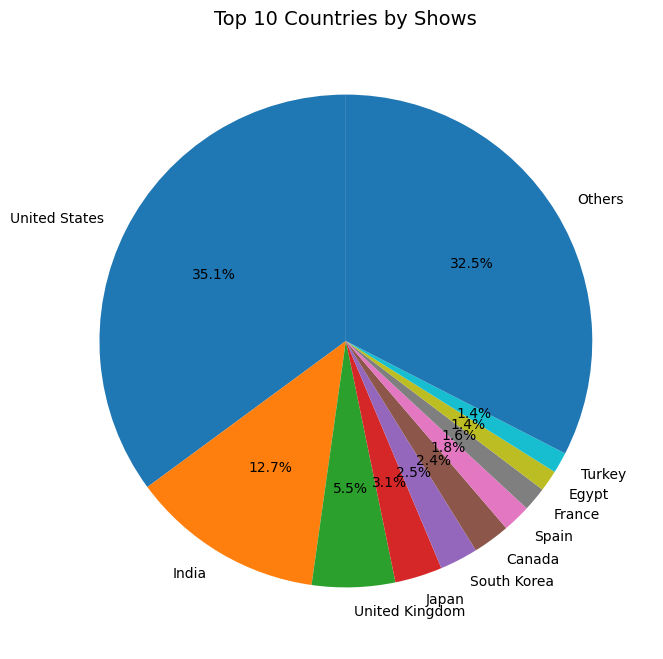

In [160]:
filtered = df_data['country'].dropna()
values = filtered.value_counts()

top_n = 10
top_values = values.head(top_n)
others = values[top_n:].sum()

# Combine into a single series
top_values['Others'] = others

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_values,
        labels=top_values.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title(f"Top 10 Countries by Shows", fontsize=14)
plt.show()

It can be observed that the majority of the shows listed in Netflix are being produced in the US, India and the UK

Distribution based on Genre

In [161]:
df_data['listed_in'].value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
"Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy",1
"Docuseries, Science & Nature TV, TV Action & Adventure",1
"British TV Shows, Classic & Cult TV, Kids' TV",1


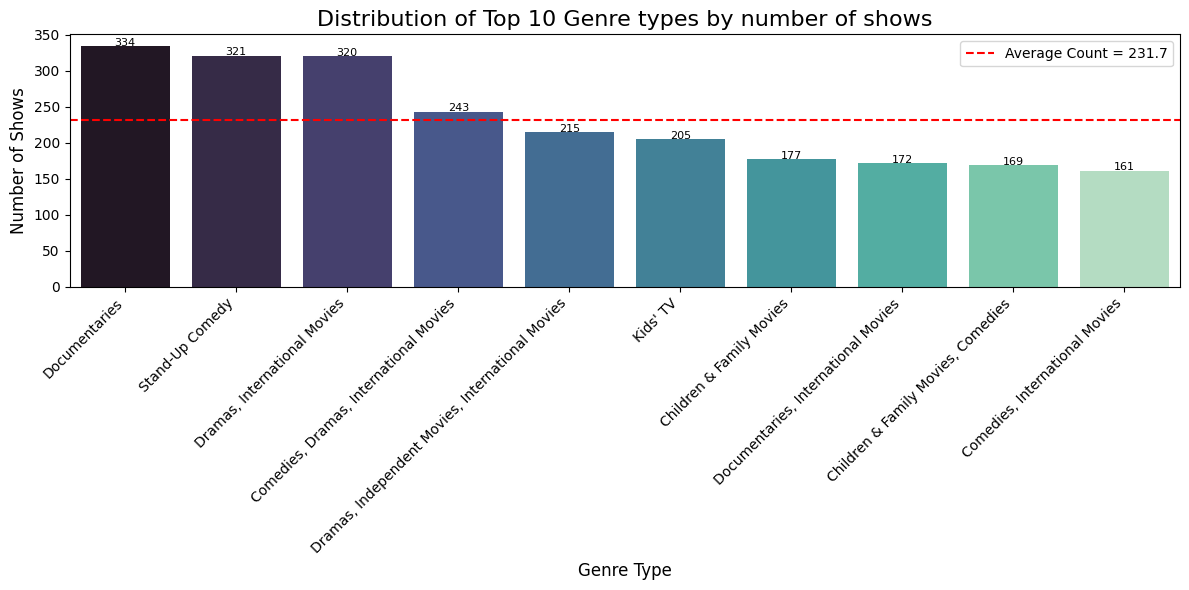

In [162]:
filtered=df_data['listed_in'].dropna()
values = filtered.value_counts().head(10)

avg_count = values.mean()

top_n = 10
top_values = values.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_values.index, y=top_values.values, palette="mako")

plt.axhline(avg_count, color='red', linestyle='--', linewidth=1.5, label=f'Average Count = {avg_count:.1f}')

plt.title(f"Distribution of Top 10 Genre types by number of shows", fontsize=16)
plt.xlabel("Genre Type", fontsize=12)
plt.ylabel("Number of Shows", fontsize=12)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_values.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

It can be seen that majority of the shows fall in the categories of documentaries, stand-up comedy and dramas with average figure being 232 shows

Distribution of Shows by Rating Certificate

In [163]:
df_data['rating'].value_counts()

,count
rating,
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194


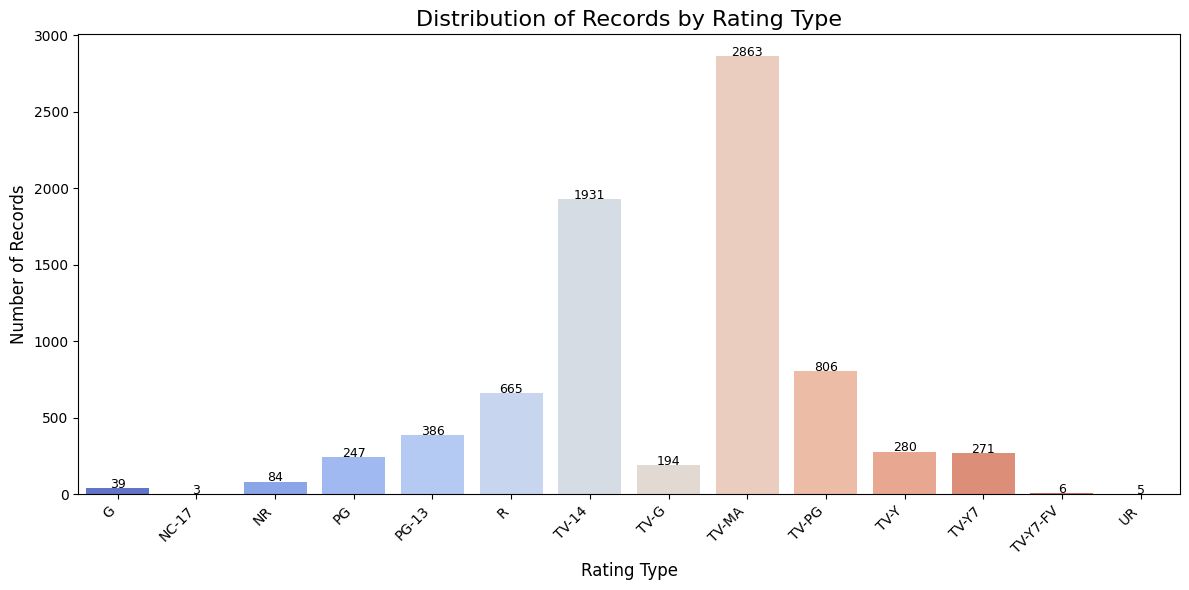

In [164]:
ratings = df_data['rating'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=ratings.index, y=ratings.values, palette="coolwarm")

plt.title("Distribution of Records by Rating Type", fontsize=16)
plt.xlabel("Rating Type", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(ratings.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

From this bar chart it is evident that majority of the shows are getting TV-MA and TV-14 ratings

Shows by Year of release

In [165]:
df_data['release_year'].value_counts()

,count
release_year,
2018,1121
2017,1012
2019,996
2016,882
2020,868
...,...
1966,1
1925,1
1964,1


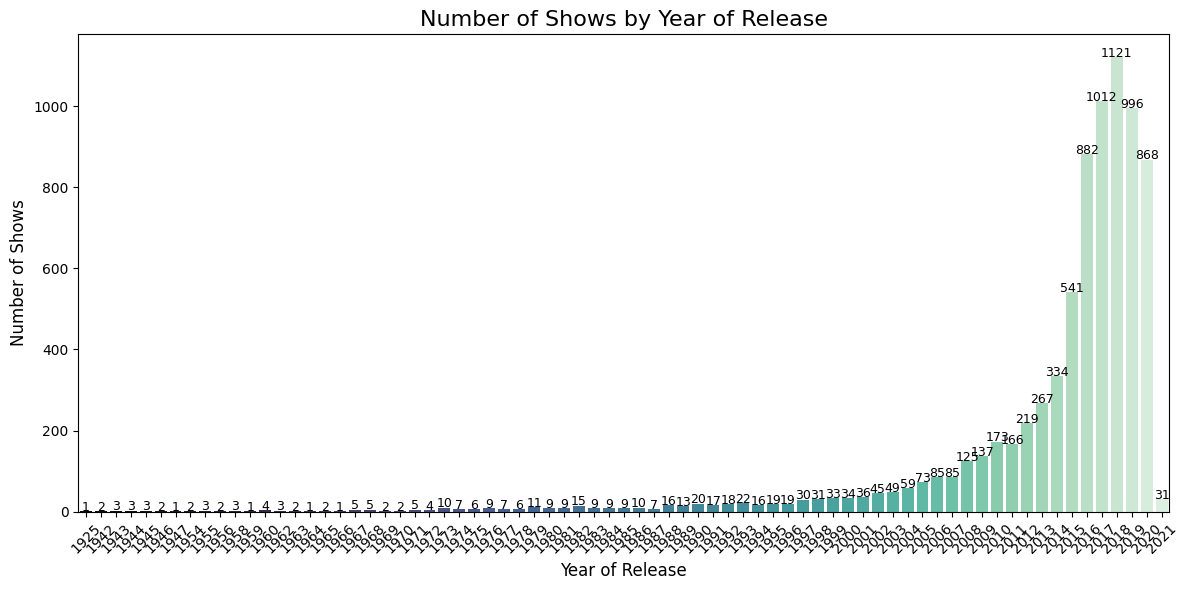

In [166]:
year_counts = df_data['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="mako")

plt.title("Number of Shows by Year of Release", fontsize=16)
plt.xlabel("Year of Release", fontsize=12)
plt.ylabel("Number of Shows", fontsize=12)

plt.xticks(rotation=45)

for i, v in enumerate(year_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Based on this bar chart, most of the listed movies are newly released movies within years 2010-2020

Shows by Date of listing

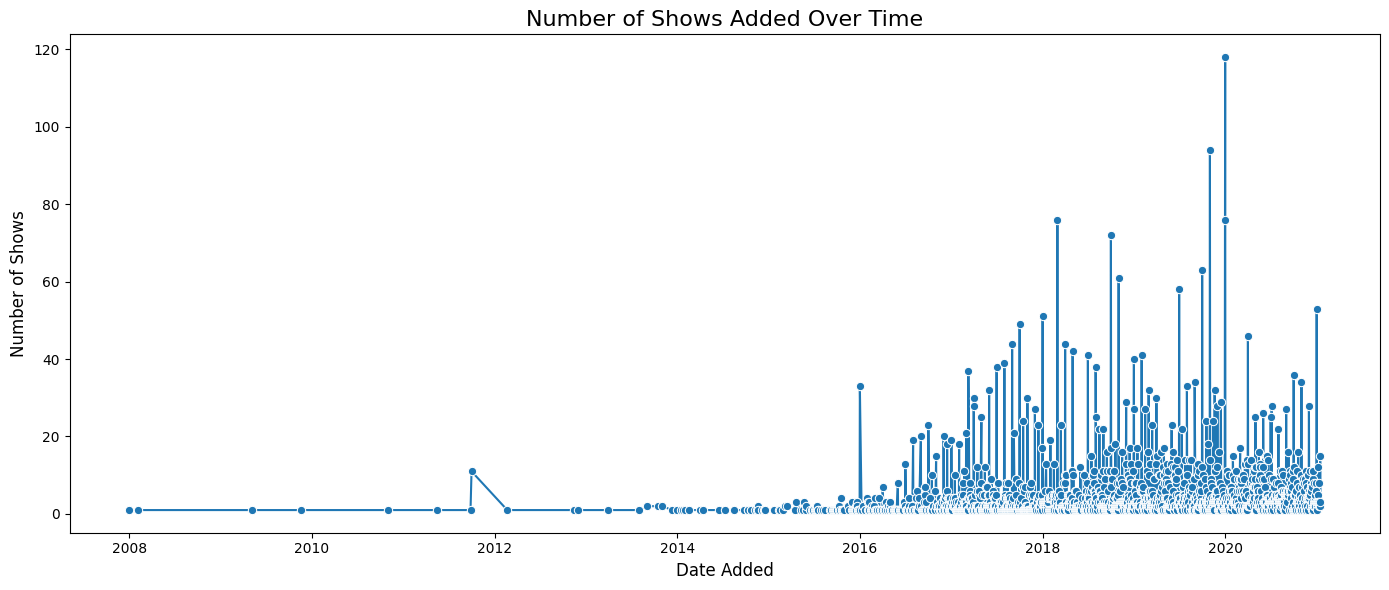

In [167]:
df_data['date_added'] = pd.to_datetime(df_data['date_added'], errors='coerce')

date_counts = df_data['date_added'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o')

plt.title("Number of Shows Added Over Time", fontsize=16)
plt.xlabel("Date Added", fontsize=12)
plt.ylabel("Number of Shows", fontsize=12)

plt.tight_layout()
plt.show()

The line chart of date of listing tells us that although many movies have been released in 2010 and earlier, majority of them have been listed after 2016, indicating high growth of Netflix from 2016

Using Correlation heatmap for Bivariate analysis

Correlation Heatmap between Country of Origin and Rating Certificate

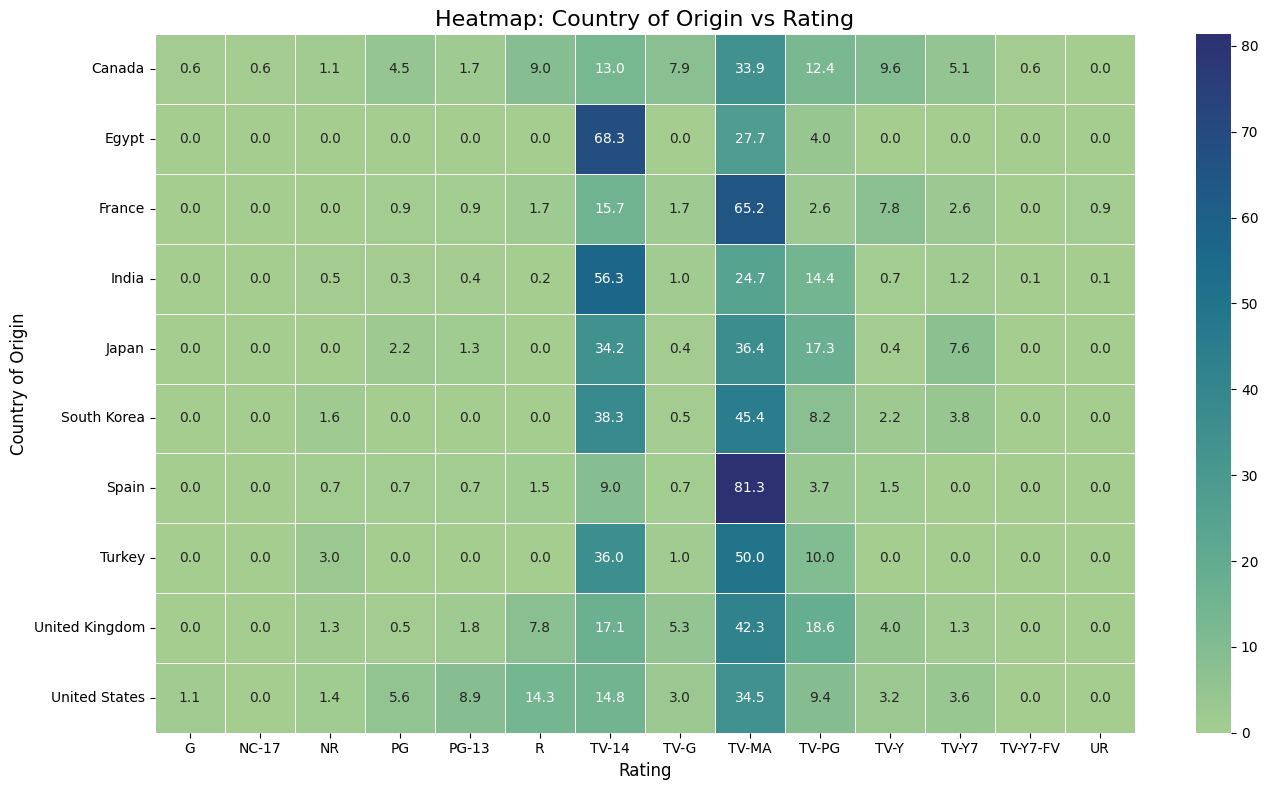

In [168]:
country_col = 'country'
rating_col = 'rating'

filtered = df_data.dropna(subset=[country_col, rating_col])

top_countries = filtered[country_col].value_counts().head(10).index
filtered = filtered[filtered[country_col].isin(top_countries)]

# Create a cross-tab (counts of Rating by Country)
country_rating_ct = pd.crosstab(filtered[country_col], filtered[rating_col])
country_rating_pct = country_rating_ct.div(country_rating_ct.sum(axis=1), axis=0) * 100

# Optional: Normalize by row to show proportions instead of counts
# country_rating_ct = country_rating_ct.div(country_rating_ct.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
sns.heatmap(country_rating_pct, annot=True, fmt=".1f", cmap="crest", linewidths=0.5)

plt.title("Heatmap: Country of Origin vs Rating", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Country of Origin", fontsize=12)
plt.tight_layout()
plt.show()

The correlation heatmap shows majority of the countries are producting shows with TV-MA and TV-14 ratings. US is the only country producing shows with different variety of age ratings. TV-PG is the only other major rating of shows for other countries like UK, Japan, India and Canada

In [169]:
ratings = {
    'TV-MA': 'Adult',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'R': 'Adult',
    'PG-13': 'Teens',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adult',
    'UR': 'Adult',
    'NR': 'Adult',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-Y7-FV': 'Kids'
}

df_data['target_ages'] = df_data['rating'].replace(ratings)
df_data['target_ages'].head(10)

,target_ages
0,Adult
1,Adult
2,Adult
3,Teens
4,Teens
5,Adult
6,Adult
7,Adult
8,Teens
9,Adult


Plotting correlation heatmap in regards to target ages

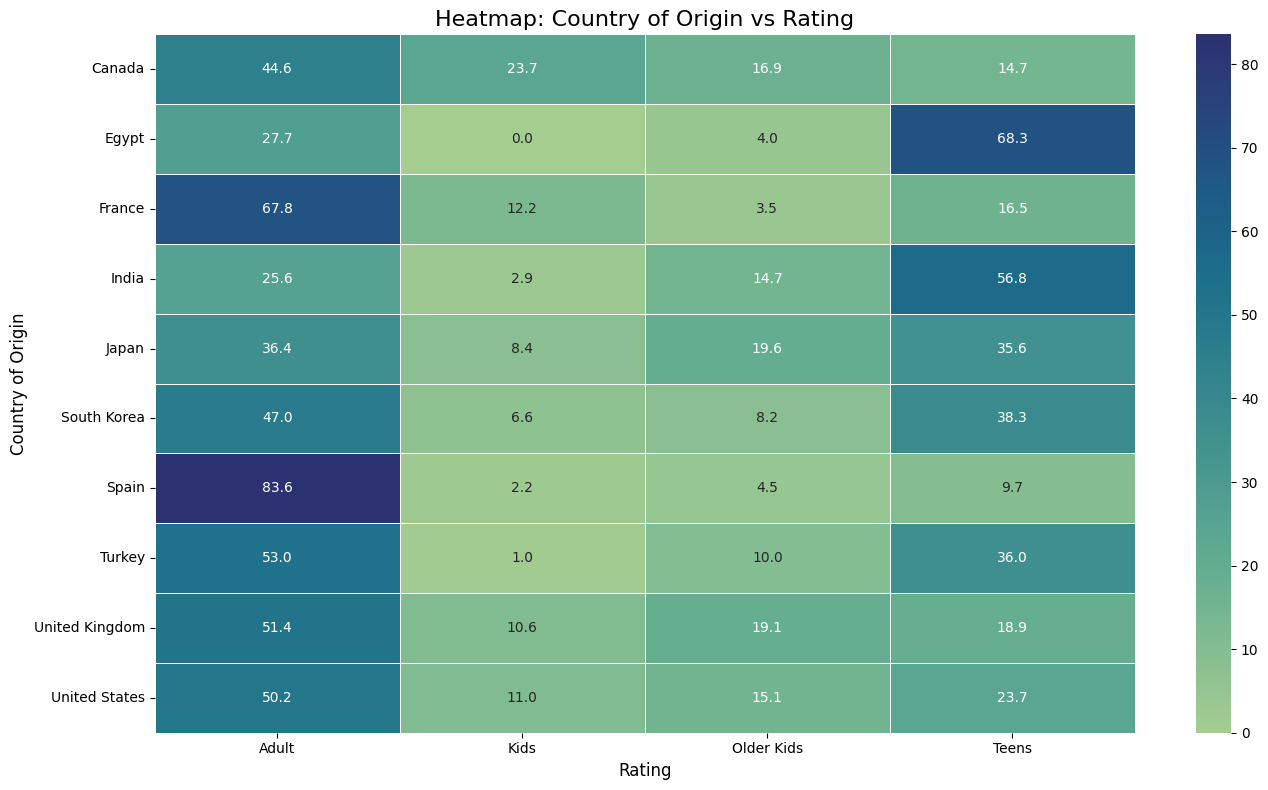

In [170]:
country_col = 'country'
rating_col = 'target_ages'

filtered = df_data.dropna(subset=[country_col, rating_col])

top_countries = filtered[country_col].value_counts().head(10).index
filtered = filtered[filtered[country_col].isin(top_countries)]

# Create a cross-tab (counts of Rating by Country)
country_rating_ct = pd.crosstab(filtered[country_col], filtered[rating_col])
country_rating_pct = country_rating_ct.div(country_rating_ct.sum(axis=1), axis=0) * 100

# Optional: Normalize by row to show proportions instead of counts
# country_rating_ct = country_rating_ct.div(country_rating_ct.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
sns.heatmap(country_rating_pct, annot=True, fmt=".1f", cmap="crest", linewidths=0.5)

plt.title("Heatmap: Country of Origin vs Rating", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Country of Origin", fontsize=12)
plt.tight_layout()
plt.show()

This correlation mapping tells us that higher number of shows are produced for teens and younger generation in countries like Egypt, India, Japan, South Korea and Turkey

Clustering

In [171]:
data1 = df_data.copy()

In [172]:
data1.fillna('Unknown', inplace=True)

In [173]:
data1['cluster_cols'] = (data1['cast'] + '_' + data1['country'] + '_' + data1['listed_in'] + '_' + data1['description'])

In [174]:
data1['cluster_cols'][30]

'Unknown_Canada_Documentaries, International Movies_This pawesome documentary explores how our feline friends became online icons, from the earliest text memes to the rise of celebrity cat influencers.'

Text Preprocessing with NLTK

In [175]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    text = str(text).lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.isalpha()]

    tokens = [word for word in tokens if word not in stop_words]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    cleaned_text = ' '.join(tokens)

    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [176]:
data1['cluster_cols']=data1['cluster_cols'].apply(preprocess_text)

In [177]:
data1['cluster_cols'][30]

'international pawesome documentary explores feline friend became online icon earliest text meme rise celebrity cat influencers'

Vectorization with TFIDF

In [178]:
vectorizer = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    stop_words='english'
)

cluster_data = data1['cluster_cols']
X = vectorizer.fit_transform(cluster_data)
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 223993 stored elements and shape (7787, 20000)>

In [179]:
X.shape

(7787, 20000)

In [181]:
X=X.toarray()

Performing PCA for dimensionality reduction

In [182]:
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

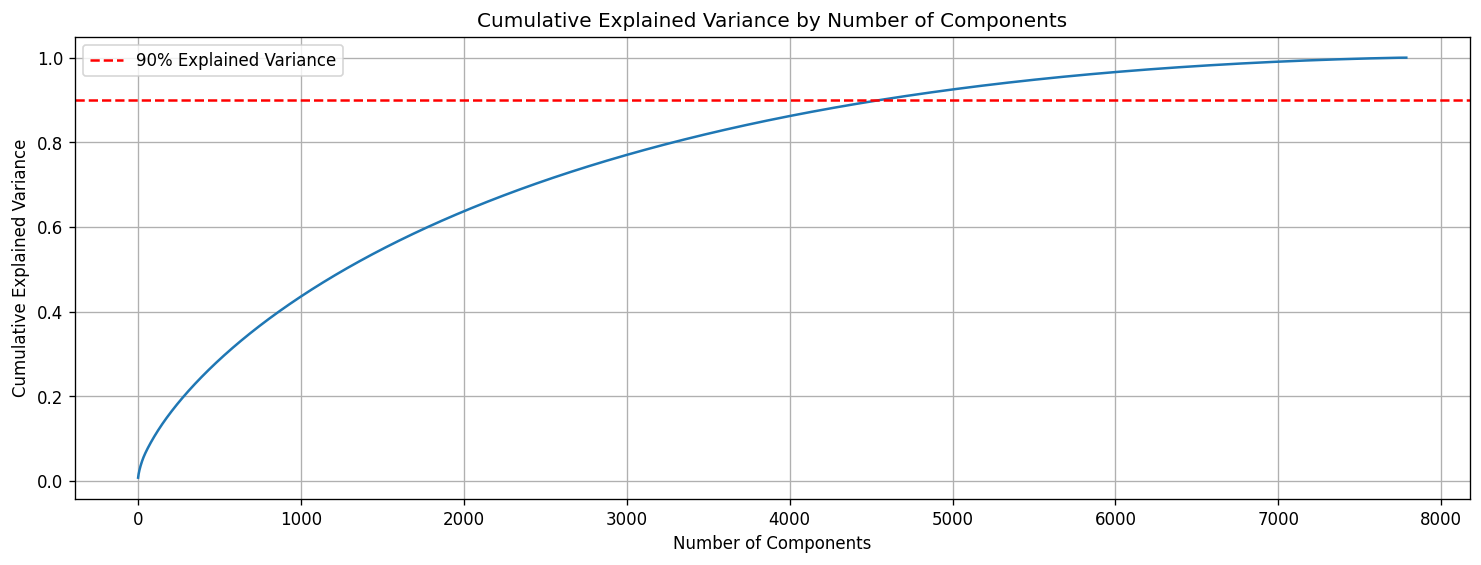

In [187]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(15, 5), dpi=120)
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.axhline(y=0.9, color='r', linestyle='--', label = '90% Explained Variance')
plt.legend()
plt.grid()
plt.show()

From this graph of PCA it can be noted that we can achieve significant reduction in number of components if we work with 90% of the data through PCA

Reducing number of components

In [188]:
pca1 = PCA(n_components = 0.9, random_state=42)
X_pca = pca.fit_transform(X)

In [189]:
print(X_pca.shape)
print(X_pca)

(7787, 7787)
[[ 1.65127578e-01 -3.04281190e-02 -3.85927802e-02 ...  4.83642798e-21
   1.04218856e-21 -7.08596067e-21]
 [-3.50898313e-02 -5.03064907e-03 -6.25821420e-03 ...  4.83642798e-21
   1.04218856e-21 -7.08596067e-21]
 [-4.06231771e-02  3.44901565e-02  2.33680605e-02 ...  4.83642798e-21
   1.04218856e-21 -7.08596067e-21]
 ...
 [-7.27861262e-02  6.64842282e-02 -5.51643845e-02 ...  4.83642798e-21
   1.04218856e-21 -7.08596067e-21]
 [ 3.52297612e-02 -3.17914991e-02 -1.35869745e-02 ...  4.83642798e-21
   1.04218856e-21 -7.08596067e-21]
 [-5.87648858e-02 -4.16370596e-02  4.15857962e-03 ...  4.83642798e-21
   1.04218856e-21 -7.08596067e-21]]


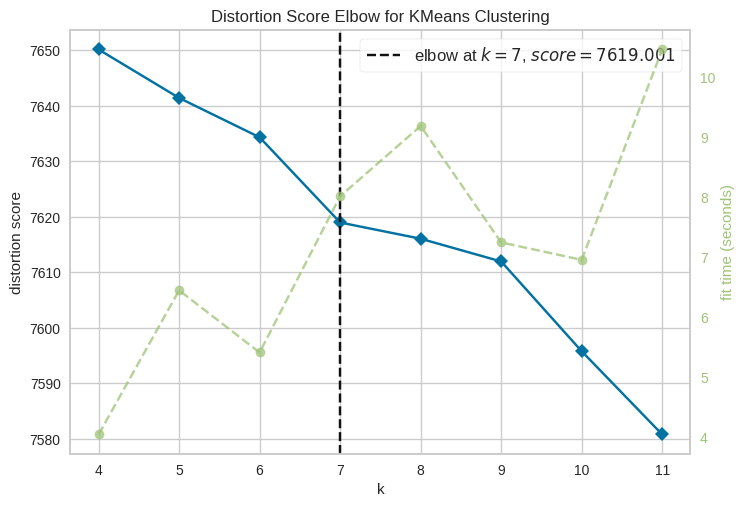

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [190]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4,12), locate_elbow=True)
visualizer.fit(X_pca)
visualizer.show()

This plot shows the distortion score from KMeans clustering and identifies the elbow point which is at k = 7

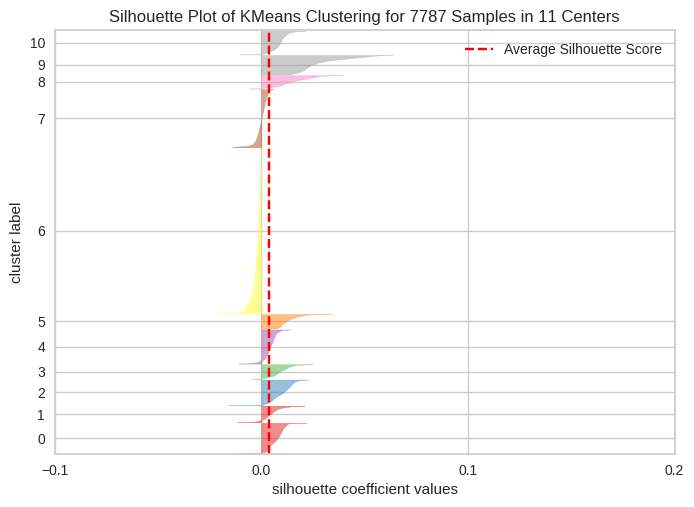

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7787 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [192]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2, 5):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_pca)
        centers = kmeans.cluster_centers_

        silhouette_avg = silhouette_score(X_pca, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

visualizer = SilhouetteVisualizer(model)
visualizer.fit(X_pca)
visualizer.show()

This plot shows the silhouette score with respect to number of centers chosen

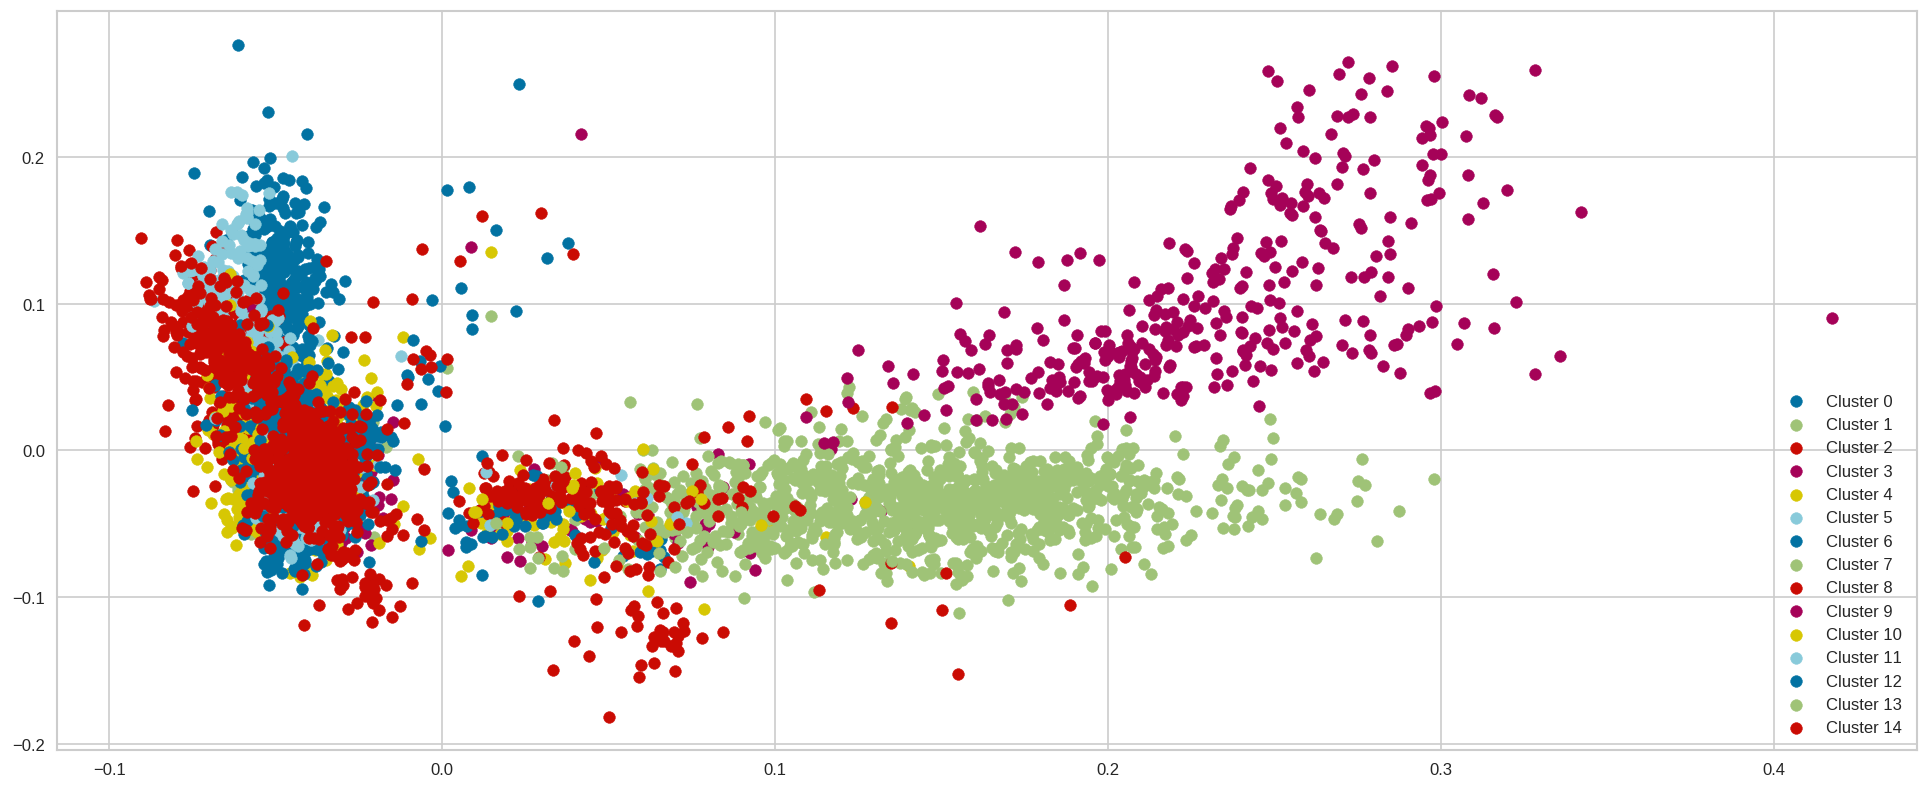

In [194]:
plt.figure(figsize=(20, 8), dpi=120)
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
unique_labels = np.unique(cluster_labels)
for i in unique_labels:
    cluster_data = X_pca[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.legend()
plt.show()

This plot shows the distribution of all the 15 clusters through 15 diffrent color palettes.

**Conclusion**

Upon performing KMeans clustering we can observe that we are reaching the elbow point at k = 7. From the silhouette scores we plot the silhouette values for upto 11 centers and we can see the silhouette score largely stays position up to 5 centers, dips to negative for 6 and 7 centers and again comes out positive for 8 to 11 centers. From the scatter plot of 15 clusters we can note that most of the important clusters are closely grouped together.